In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, widgets
import data
import matplotlib.dates as mdates
import warnings
import csv
import deconvolution
import datetime
from covid_forecast import *
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
matplotlib.rcParams['figure.figsize'] = (10., 6.)
import matplotlib.ticker as mtick
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
palette = plt.get_cmap('tab10')

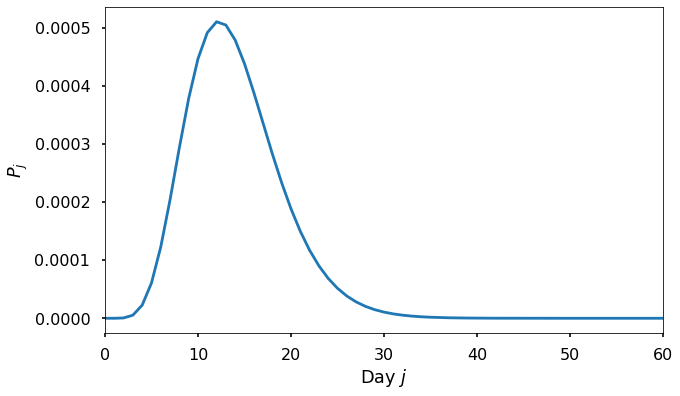

In [2]:
gamma = default_gamma
ifr = default_ifr
pdf = deconvolution.generate_pdf(8.,1./gamma/8.)
plt.plot(pdf*ifr)
plt.xlim(0,60); plt.ylabel('$P_j$'); plt.xlabel('Day $j$');
plt.savefig('ttd.pdf')

In [3]:
deconvolution.get_offset(pdf,threshold=0.10)

21

# Inferred real infections

In [38]:
smooth=True
nTrials = 1
offset=21

In [18]:
region='Spain'
gamma = 1./14
beta = 3.0*gamma
ifr = avg_ifr(region,'mean')
N = data.get_population(region)
data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth=True)
data_start = mdates.date2num(data_dates[0])  # First day for which we have data
inf_dates, delta_I = get_past_infections(region,beta,gamma,nTrials=nTrials)

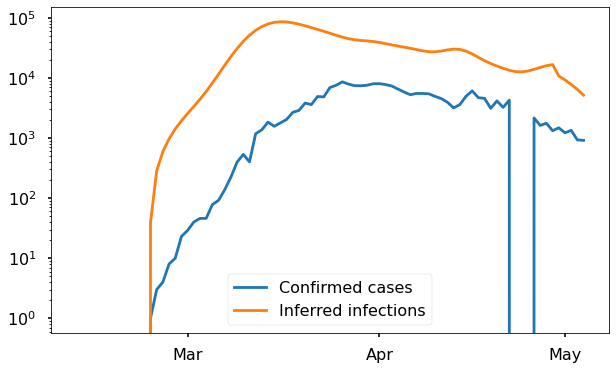

In [19]:
undercount_spain = delta_I[1:-offset]/np.diff(cum_cases)[:-offset]
start = 20
plt.plot_date(data_dates[start+1:-offset],np.diff(cum_cases)[start:-offset],'-')
plt.plot_date(inf_dates[start+1:-offset],delta_I[start+1:-offset],'-')
ax = plt.gca()
ax.set_yscale('log');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.legend(['Confirmed cases','Inferred infections'])
plt.savefig('Infections_'+region+'.pdf')

In [20]:
region='Italy'
gamma = 1./14
beta = 3.0*gamma
ifr = avg_ifr(region,'mean')
N = data.get_population(region)
data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth)
data_start = mdates.date2num(data_dates[0])  # First day for which we have data
inf_dates, delta_I = get_past_infections(region,beta,gamma,nTrials=nTrials)

#u0, offset, inf_dates, I, R, delta_I = \
#            infer_initial_data(cum_deaths,data_start,ifr,gamma,N,
#                               method='deconvolution',extended_output=1,slow=True)

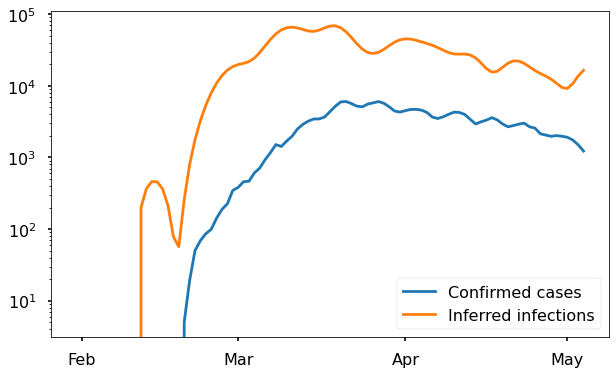

In [21]:
undercount_italy = delta_I[1:-offset]/np.diff(cum_cases)[:-offset]
start = 8
plt.plot_date(data_dates[start+1:-offset],np.diff(cum_cases)[start:-offset],'-')
plt.plot_date(inf_dates[start+1:-offset],delta_I[start+1:-offset],'-')
ax = plt.gca()
ax.set_yscale('log');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.legend(['Confirmed cases','Inferred infections'])
plt.savefig('Infections_'+region+'.pdf')

In [39]:
region='US'
gamma = 1./14
beta = 3.0*gamma
ifr = avg_ifr(region,'mean')
N = data.get_population(region)
data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth)
data_start = mdates.date2num(data_dates[0])  # First day for which we have data
inf_dates, delta_I = get_past_infections(region,beta,gamma,nTrials=nTrials)

In [54]:
new_cases = sum(delta_I[-offset-window:-offset])
detected_cases = sum(np.diff(cum_cases)[-offset-window+delay:-offset+delay])
print(region, new_cases, detected_cases, new_cases/detected_cases)

US 898567.4841351372 171910 5.226964598540731


In [53]:
print(data_dates[-offset-window])
print(data_dates[-offset])

2020-04-29 00:00:00
2020-05-06 00:00:00


In [65]:
delay = 5
window = 7

21

In [64]:
nTrials = 1

for region in ['US','Brazil','Russia','United Kingdom','Spain','Italy','France','Germany','Turkey','India']:
    data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth)
    data_start = mdates.date2num(data_dates[0])  # First day for which we have data
    inf_dates, delta_I = get_past_infections(region,beta,gamma,nTrials=nTrials)
    new_cases = sum(delta_I[-offset-window:-offset])
    detected_cases = sum(np.diff(cum_cases)[-offset-window+delay:-offset+delay])
    
    earlier = 28
    new_cases_apr = sum(delta_I[-offset-window-earlier:-offset-earlier])
    detected_cases_apr = sum(np.diff(cum_cases)[-offset-window+delay-earlier:-offset+delay-earlier])

    inf_dates_low, delta_I_low = get_past_infections(region,beta,gamma,which_ifr='high',nTrials=nTrials)
    new_cases_low = sum(delta_I_low[-offset-window:-offset])

    inf_dates_high, delta_I_high = get_past_infections(region,beta,gamma,which_ifr='low',nTrials=nTrials)
    new_cases_high = sum(delta_I_high[-offset-window:-offset])

    print(r'{:>15} {:.02f} ({:.2f}-{:.2f}) {:.2f}'.format(region, 
                                                   new_cases/detected_cases,
                                                   new_cases_low/detected_cases,
                                                   new_cases_high/detected_cases,
                                                   new_cases_apr/detected_cases_apr))

             US 5.23 (2.71-9.63) 7.25
         Brazil 13.91 (7.02-25.61) 17.08
         Russia 0.96 (0.49-1.74) 2.54
 United Kingdom 7.10 (3.71-13.10) 13.68
          Spain 7.75 (4.16-13.94) 6.80
          Italy 10.42 (5.51-19.40) 10.38
         France 15.55 (8.15-28.97) 10.39
        Germany 1.53 (0.84-3.14) 4.92
         Turkey 5.20 (2.51-9.46) 5.45
          India 7.31 (3.62-13.44) 9.19


In [66]:
nTrials = 10

for region in ['US','Brazil','Russia','United Kingdom','Spain','Italy','France','Germany','Turkey','India']:
    data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth)
    data_start = mdates.date2num(data_dates[0])  # First day for which we have data
    inf_dates, delta_I = get_past_infections(region,beta,gamma,nTrials=nTrials)
    new_cases = sum(delta_I[-offset-window:-offset])
    detected_cases = sum(np.diff(cum_cases)[-offset-window+delay:-offset+delay])
    
    earlier = 28
    new_cases_apr = sum(delta_I[-offset-window-earlier:-offset-earlier])
    detected_cases_apr = sum(np.diff(cum_cases)[-offset-window+delay-earlier:-offset+delay-earlier])

    inf_dates_low, delta_I_low = get_past_infections(region,beta,gamma,which_ifr='high',nTrials=nTrials)
    new_cases_low = sum(delta_I_low[-offset-window:-offset])

    inf_dates_high, delta_I_high = get_past_infections(region,beta,gamma,which_ifr='low',nTrials=nTrials)
    new_cases_high = sum(delta_I_high[-offset-window:-offset])

    print(r'{:>15} {:.2f} ({:.2f}-{:.2f}) {:.2f}'.format(region, 
                                                   new_cases/detected_cases,
                                                   new_cases_low/detected_cases,
                                                   new_cases_high/detected_cases,
                                                   new_cases_apr/detected_cases_apr))

             US 4.81 (2.73-10.09) 6.58
         Brazil 13.91 (6.93-25.48) 17.30
         Russia 0.97 (0.50-1.75) 2.53
 United Kingdom 6.93 (3.61-12.43) 14.29
          Spain 6.99 (3.83-12.50) 6.29
          Italy 10.55 (5.46-19.26) 9.52
         France 13.85 (6.95-25.22) 9.23
        Germany 3.00 (1.44-4.19) 4.41
         Turkey 4.91 (2.29-8.55) 5.26
          India 7.27 (3.72-13.46) 9.19


In [94]:
nTrials = 1000

for region in ['US','Brazil','Russia','United Kingdom','Spain','Italy','France','Germany','Turkey','India']:
    data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth)
    data_start = mdates.date2num(data_dates[0])  # First day for which we have data
    inf_dates, delta_I = get_past_infections(region,beta,gamma,nTrials=nTrials)
    new_cases = sum(delta_I[-offset-window:-offset])
    detected_cases = sum(np.diff(cum_cases)[-offset-window+delay:-offset+delay])
    
    earlier = 28
    new_cases_apr = sum(delta_I[-offset-window-earlier:-offset-earlier])
    detected_cases_apr = sum(np.diff(cum_cases)[-offset-window+delay-earlier:-offset+delay-earlier])

    inf_dates_low, delta_I_low = get_past_infections(region,beta,gamma,which_ifr='high',nTrials=nTrials)
    new_cases_low = sum(delta_I_low[-offset-window:-offset])

    inf_dates_high, delta_I_high = get_past_infections(region,beta,gamma,which_ifr='low',nTrials=nTrials)
    new_cases_high = sum(delta_I_high[-offset-window:-offset])

    print(r'{:>15} & {:.02f} &  ({:.2f}-{:.2f}) & {:.2f} \\'.format(region, 
                                                   new_cases/detected_cases,
                                                   new_cases_low/detected_cases,
                                                   new_cases_high/detected_cases,
                                                   new_cases_apr/detected_cases_apr))

             US & 5.24 &  (2.70-9.59) & 6.94 \\
         Brazil & 13.65 &  (6.91-24.91) & 17.15 \\
         Russia & 0.95 &  (0.49-1.75) & 2.53 \\


KeyboardInterrupt: 

In [ ]:
nTrials = 1000

for region in ['New York', 'New Jersey', 'Illinois', 'California',
               'Massachusetts','Pennsylvania','Texas','Michigan',
               'Florida','Maryland']:
    data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth)
    data_start = mdates.date2num(data_dates[0])  # First day for which we have data
    inf_dates, delta_I = get_past_infections(region,beta,gamma,nTrials=nTrials)
    new_cases = sum(delta_I[-offset-window:-offset])
    detected_cases = sum(np.diff(cum_cases)[-offset-window+delay:-offset+delay])
    
    earlier = 28
    new_cases_apr = sum(delta_I[-offset-window-earlier:-offset-earlier])
    detected_cases_apr = sum(np.diff(cum_cases)[-offset-window+delay-earlier:-offset+delay-earlier])

    inf_dates_low, delta_I_low = get_past_infections(region,beta,gamma,which_ifr='high',nTrials=nTrials)
    new_cases_low = sum(delta_I_low[-offset-window:-offset])

    inf_dates_high, delta_I_high = get_past_infections(region,beta,gamma,which_ifr='low',nTrials=nTrials)
    new_cases_high = sum(delta_I_high[-offset-window:-offset])

    print(r'{:>15} & {:.02f} &  ({:.2f}-{:.2f}) & {:.2f} \\'.format(region, 
                                                   new_cases/detected_cases,
                                                   new_cases_low/detected_cases,
                                                   new_cases_high/detected_cases,
                                                   new_cases_apr/detected_cases_apr))

In [93]:
nTrials = 100

for region in ['Saudi Arabia', 'Korea, South']:
    data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth)
    data_start = mdates.date2num(data_dates[0])  # First day for which we have data
    inf_dates, delta_I = get_past_infections(region,beta,gamma,nTrials=nTrials)
    new_cases = sum(delta_I[-offset-window:-offset])
    detected_cases = sum(np.diff(cum_cases)[-offset-window+delay:-offset+delay])
    
    earlier = 28
    new_cases_apr = sum(delta_I[-offset-window-earlier:-offset-earlier])
    detected_cases_apr = sum(np.diff(cum_cases)[-offset-window+delay-earlier:-offset+delay-earlier])

    inf_dates_low, delta_I_low = get_past_infections(region,beta,gamma,which_ifr='high',nTrials=nTrials)
    new_cases_low = sum(delta_I_low[-offset-window:-offset])

    inf_dates_high, delta_I_high = get_past_infections(region,beta,gamma,which_ifr='low',nTrials=nTrials)
    new_cases_high = sum(delta_I_high[-offset-window:-offset])

    print(r'{:>15} & {:.02f} &  ({:.2f}-{:.2f}) & {:.2f} \\'.format(region, 
                                                   new_cases/detected_cases,
                                                   new_cases_low/detected_cases,
                                                   new_cases_high/detected_cases,
                                                   new_cases_apr/detected_cases_apr))

   Saudi Arabia & 1.61 &  (0.79-2.93) & 6.14 \\
   Korea, South & 2.95 &  (1.54-5.55) & 3.49 \\


## Repeat calculation for Spain, but with excess mortality data

In [80]:
region='Spain'
ifr = avg_ifr(region,'mean')
N = data.get_population(region)
nTrials = 100

file = "/Users/ketch/Research/Projects/covid-data-sources/MOMO_spain/data.csv"
df = pd.read_csv(file)
df['fecha_defuncion'] = pd.to_datetime(df['fecha_defuncion'])  
rows = df.loc[(df['ambito'] == 'nacional') & (df['nombre_sexo']=='todos') & (df['nombre_gedad']=='todos')
              & (df['fecha_defuncion']>'2020-03-09')]


trunc = 14 # Last two weeks of data are incomplete
expected = np.array(rows.defunciones_esperadas[:-trunc])
observed = np.array(rows.defunciones_observadas[:-trunc])
data_dates = np.array(rows.fecha_defuncion[:-trunc])
data_start = mdates.date2num(data_dates[0])-62
deaths = observed - expected
deaths = np.insert(deaths,0,[0]*62)  # Pad with zeros
cum_deaths = np.cumsum(deaths)

u0, offset, inf_dates_em, inf_I, inf_R, delta_I_em = \
    infer_initial_data(cum_deaths,data_start,ifr,gamma,N,extended_output=1,nTrials=nTrials)

In [81]:
mdates.num2date(inf_dates[-1])

datetime.datetime(2020, 5, 26, 0, 0, tzinfo=datetime.timezone.utc)

In [82]:
new_cases = sum(delta_I_em[-offset-window:-offset])
detected_cases = sum(np.diff(cum_cases)[-offset-window+delay:-offset+delay])
print(new_cases/detected_cases)

9.996249452715718


In [83]:
earlier = 28
new_cases_apr = sum(delta_I_em[-offset-window-earlier:-offset-earlier])
detected_cases_apr = sum(np.diff(cum_cases)[-offset-window+delay-earlier:-offset+delay-earlier])
print(new_cases_apr/detected_cases_apr)

200.17500621071383


In [91]:
data_dates, cum_cases, cum_deaths = data.load_time_series(region,smooth)
inf_dates, delta_I = get_past_infections(region,beta,gamma,nTrials=100)

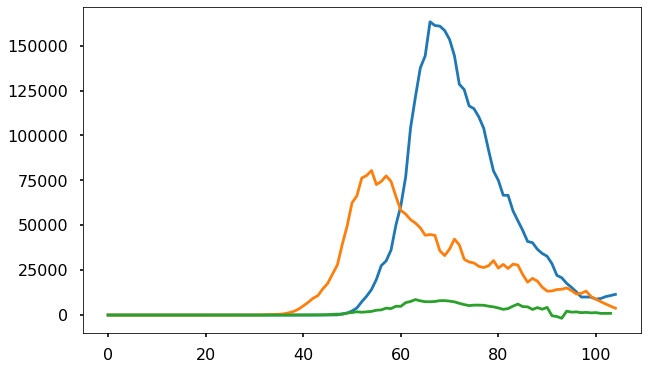

In [92]:
plt.plot(delta_I_em[:-offset])
plt.plot(delta_I[-len(delta_I_em):-offset])
plt.plot(np.diff(cum_cases)[-len(delta_I_em):-offset])